# Project: Investigate No Show Appointments Dataset
#### Author : Ahmed Mohamed Soliman

## Describing the features of the data

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not

patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

# Introductions :

Questions we are trying to answer :

1 - what is the overall appointment show-up vs. no show-up rate?

2 - is there a relation between patient's Showing to the clinic and Age?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column:it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

we will try to understand what factors are important for us to know in order to predict if a patient will show up for thier scheduled appointment or no!

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# inspect the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# here We will find the number of patients(rows) and thier characteristics(columns)
df.shape

(110527, 14)

In [5]:
#see if there is any duplicates
sum(df.duplicated())

0

In [6]:
# find discribtion of my dataset (mean,median,etc...)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- the mean of ages is 37 years.

- maximum age is 115 years.

- the mean of patients having diabetes is 0.071

### General Observations
- To answer the research questions, the columns PatiendID and AppointmentID do not seem necessary and will therefore be dropped.
- The column Handcap seems to have more detail as we here see a max value of 4. A closer look to the value distribution is needed.
- The min value -1 of the Age-colum seems odd and will therefore be inspected.
- The types of ScheduledDay and AppointmentDay need converted to DateTime.
- renaming No-show To Underscore No_show and converting the column to 0 and 1 instead of 'yes' and 'no' so we can handle using plot or goupby for more precise value definition and easier handling to facilitate the data anaylsis process.

### Data Cleaning 

In [7]:
# we probably won't need the Patient ID , Appointment ID in our data analysis process because they doesn't seem necessary and will therefore be dropped 
df.drop(['PatientId','AppointmentID'], axis = 1 ,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# inspecting Handcap because the column includes values like 4 and it should be binary 0 for no handcap and 1 for handcap 
#or there is some hidden details i don't understand so we will inspect the column more.
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

- there's seems to be a handicap-degree in the handcap column from 0(there's no handcap) and from 1 to 4 there's a handcap that varies from low to high handcap so we shall copy that column and combine the values of degree 1 to 4 to 1 only to help our data analysis process.

In [9]:
#combining handcap column to 0 and 1 only
df['Handcapcombined'] = df['Handcap'].astype('bool')
df['Handcapcombined'].value_counts()
df.head() #checking the Handcapcombined column

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcapcombined
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False


#### The min value -1 of the Age-colum seems odd and will therefore be inspected

In [10]:
df.loc[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcapcombined
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No,False


- It seems that the value has just been recorded incorrectly. We can therefore delete that row.

In [11]:
df.drop([99832], inplace=True)

- now we need to convert types of ScheduledDay and AppointmentDay to DateTime

In [12]:
#Inspection of column ScheduledDay
print(df['ScheduledDay'].head())

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object


In [13]:
#Inspection of column AppointmentDay
print(df['AppointmentDay'].head())

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object


- Source applied for the conversion:https://stackoverflow.com/questions/43316608/remove-timestamp-from-date-string-in-python

In [14]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['ScheduledDay'].head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


In [15]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['AppointmentDay'].head())

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [16]:
#Correcting 'hypertension' spelling
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcapcombined
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False


In [17]:
#replacing the dash in No-show To Underscore "No_show"
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Handcapcombined
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False


In [18]:
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [19]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

<ipython-input-19-438d1a82a588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes'] = '1'
<ipython-input-19-438d1a82a588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'No'] = '0'


In [20]:
df.to_csv('KaggleV2-May-2016-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis


#### Histogram of the whole dataset (general look on the data)

In [21]:
dfc = pd.read_csv('KaggleV2-May-2016-cleaned.csv')
dfc.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Handcapcombined,showed,not_showed
0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,False,True,False
1,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,False,True,False
2,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,False,True,False
3,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,False,True,False
4,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,False,True,False


Histograming all columns except handcap combined and No_show columns because the columns type is bool source applied from :https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas

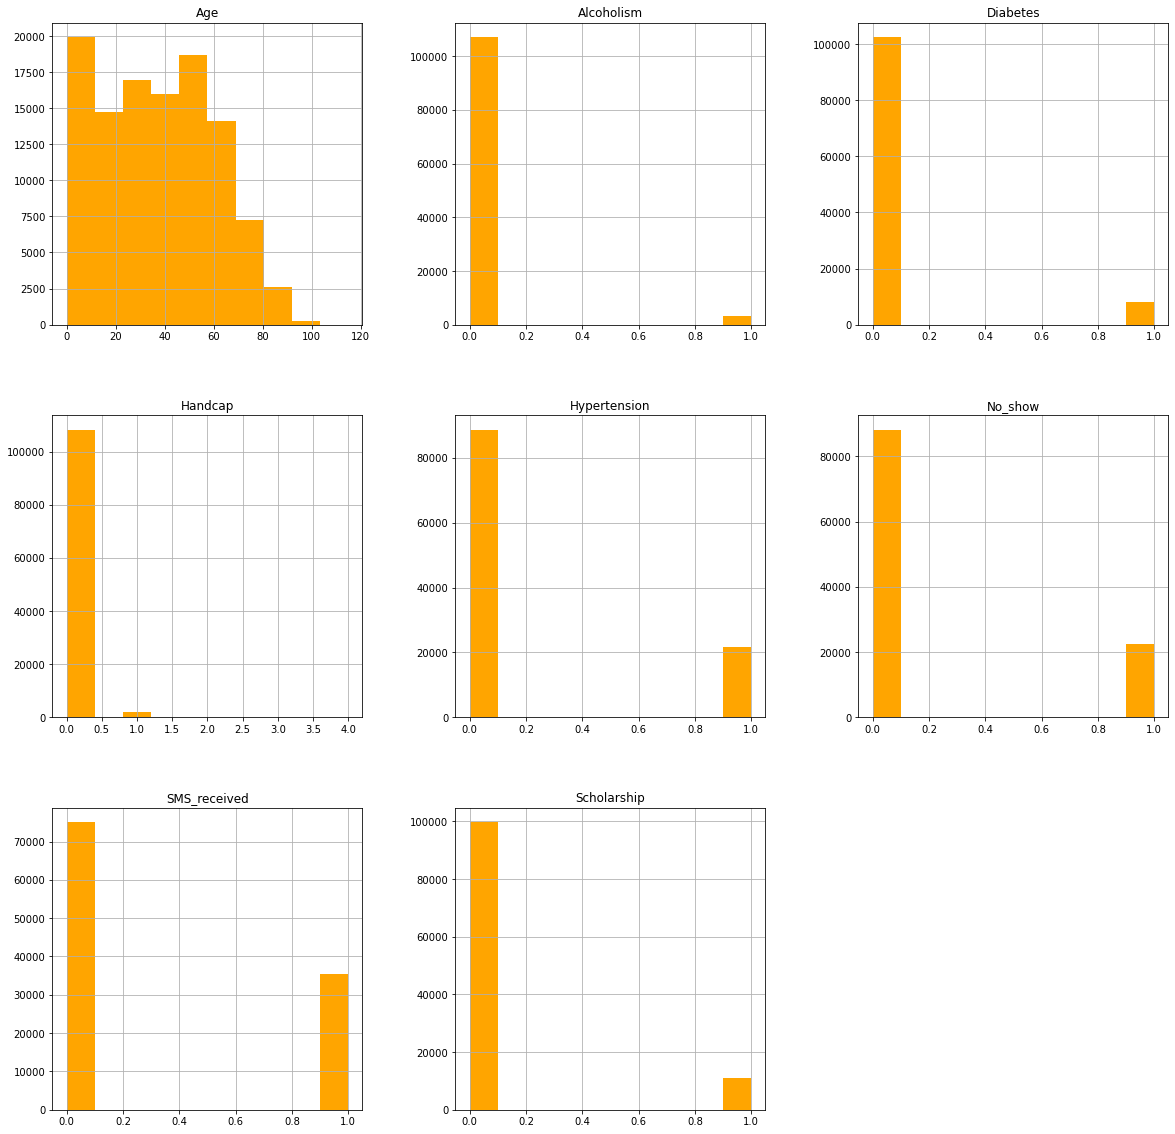

In [22]:
dfc[dfc.columns.difference(['Handcapcombined','showed','not_showed'])].hist(figsize=(20,20),color='orange'); 

-a very Small number of patients suffer from alcholism,diabetes but about 25% of patients suffer from Hypertension and about 95% of the patients are not handicapped

-number of patients who recieved SMS is half the number of those who didn't receive SMS


### Research Question 1 : what is the overall appointment show-up vs. no show-up rate?

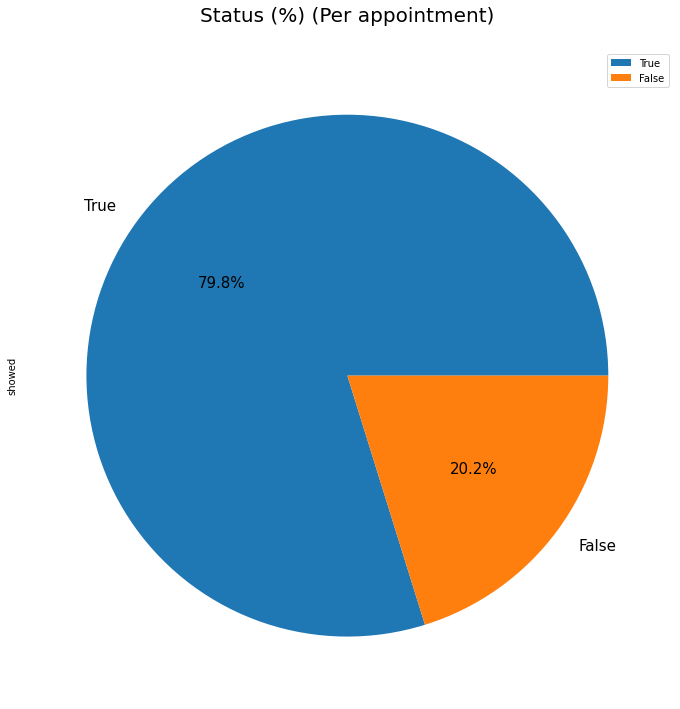

In [23]:
s = dfc['showed'].value_counts()
piechart = s.plot.pie(figsize=(12,12) ,autopct='%1.1f%%', fontsize = 15);
piechart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 20);
plt.legend();

In [24]:
print(df.showed.value_counts())

True     88207
False    22319
Name: showed, dtype: int64


### Research Question 2: is there a relation between patient's Showing to the clinic and Age ?

Text(0.5, 1.0, 'Age of people who showed')

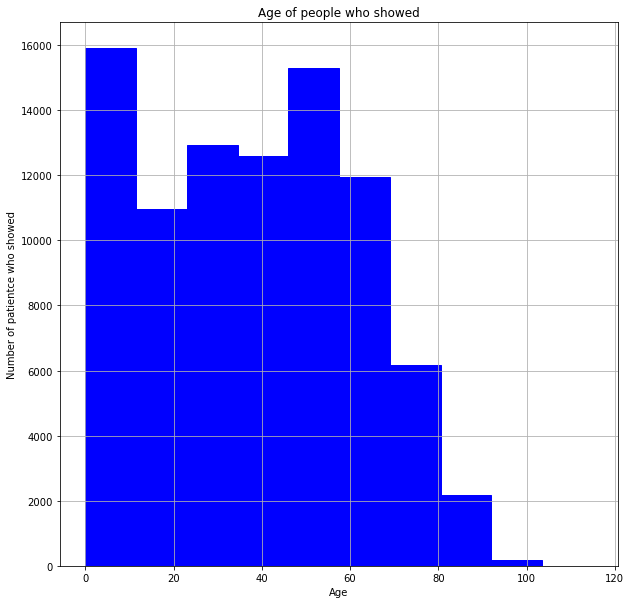

In [29]:
df.groupby('showed')['Age'].hist(figsize=(10,10),Color='blue');
plt.xlabel("Age")
plt.ylabel("Number of patientce who showed")
plt.title("Age of people who showed")

### -Patients in the age between 0-10 showed more than any other age group and the older they get the less they show to the clinic in the appointment

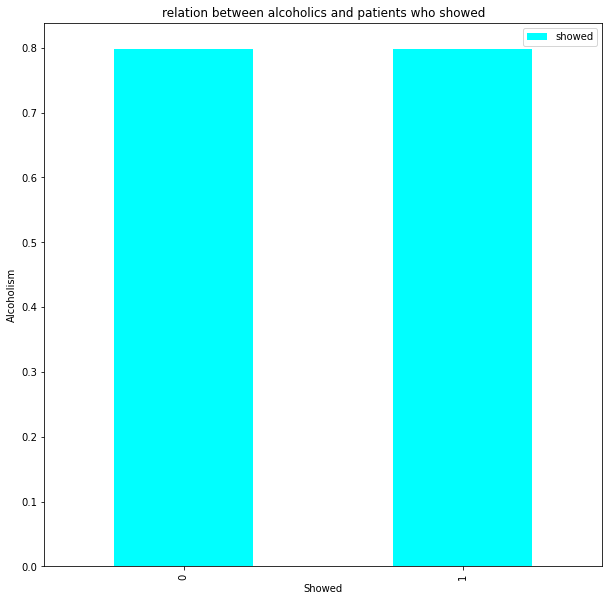

In [26]:
#see the relation between alcoholic people and people who showed up and who didn't
df.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(10,10),color='cyan');
plt.xlabel("Showed")
plt.ylabel("Alcoholism")
plt.title("relation between alcoholics and patients who showed")
plt.legend()

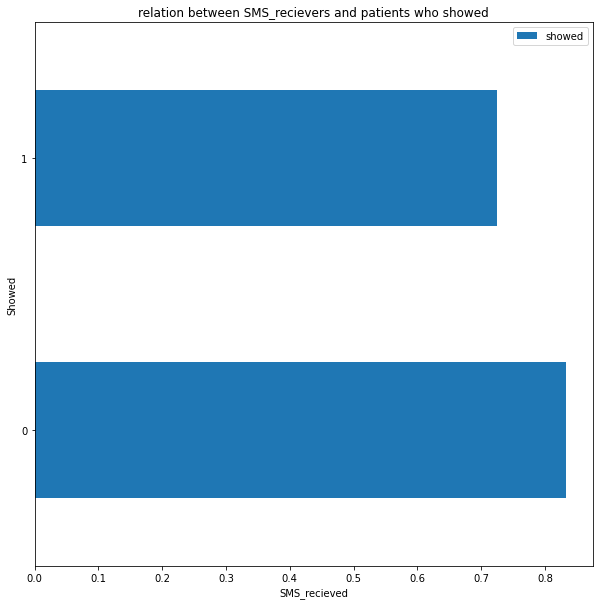

In [27]:
#see the relation between sms recievers and people who showed up and who didn't
df.groupby('SMS_received')['showed'].mean().plot(kind='barh',figsize=(10,10));
plt.xlabel("SMS_recieved")
plt.ylabel("Showed")
plt.title("relation between SMS_recievers and patients who showed")
plt.legend()

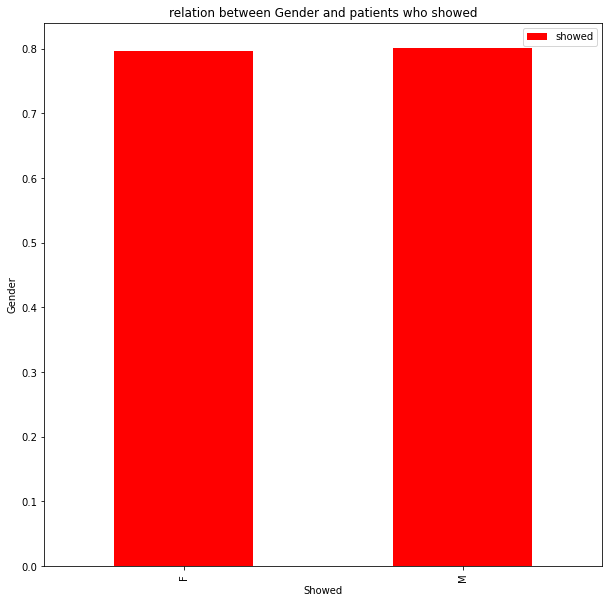

In [28]:
#see the relation between Gender and people who showed up and who didn't
df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(10,10),color='red');
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions
- Age has it's role effecting the showing to the clinic as those in the age group between 0 and 10 were the most to show up followed by the age group 35-70.
- appointment show-up rate is away more high than appointment no show-up rate by 59.6%

### Limitations:
- Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not.

- there we some illogical data such as patients with age 0 or less